# Parallelisation

## Setup

In [38]:
import json
import sys
from pandas import DataFrame
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
# from datasketch import MinHash, MinHashLSH

plt.rcParams["figure.figsize"] = [20, 10]
plt.rcParams.update({'font.size': 26})

def createGraph(paths, figureTitle, isSave = False, figureName = ""):
    threadCount = 1
    dataToDF = []
    for path in paths:
        dataToDF.append({'time': (json.load(open(path, encoding="utf8")))["elapsedTime"] / 1000000, 'threadCount': threadCount})
        threadCount = threadCount + 1

    df = DataFrame(dataToDF)

    plot = df.plot(x="threadCount", y="time", legend=False, title=figureTitle, ylabel="Time in seconds", xlabel="Isolate Count", marker="o")
    
    for k, v in df.iterrows():
        plot.annotate(f"{v['time']} seconds", (v["threadCount"], v["time"]))

    if isSave:
        plot.get_figure().savefig(figureName)

## Sentiment Analysis

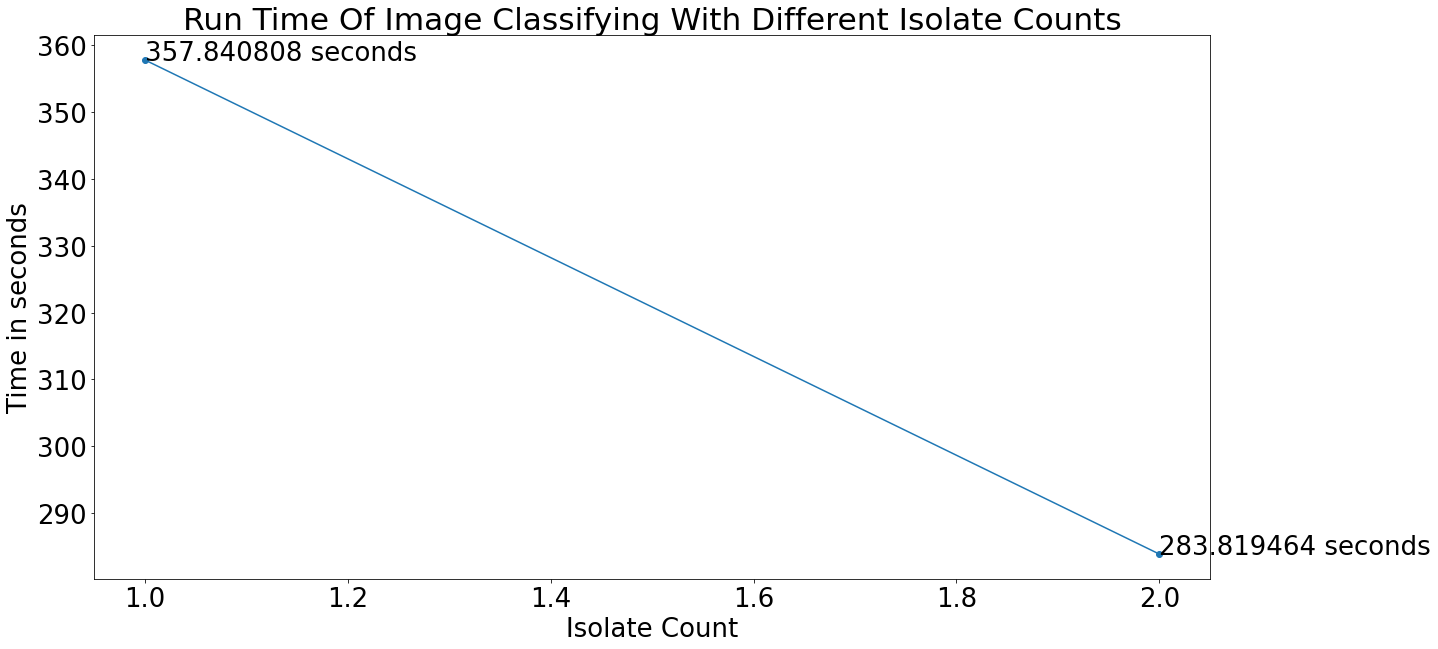

In [40]:
sentidata = ["data/sentiment/fb-t1-Sentiment classification.json", \
    "data/sentiment/fb-t2-Sentiment classification.json"]

# createGraph(imagesData, "Run Time Of Image Classifying With Different Isolate Counts")
createGraph(sentidata, "Run Time Of Image Classifying With Different Isolate Counts", isSave = False, figureName = "Parallel Sentiment Analysis.jpg")

## Image tagging

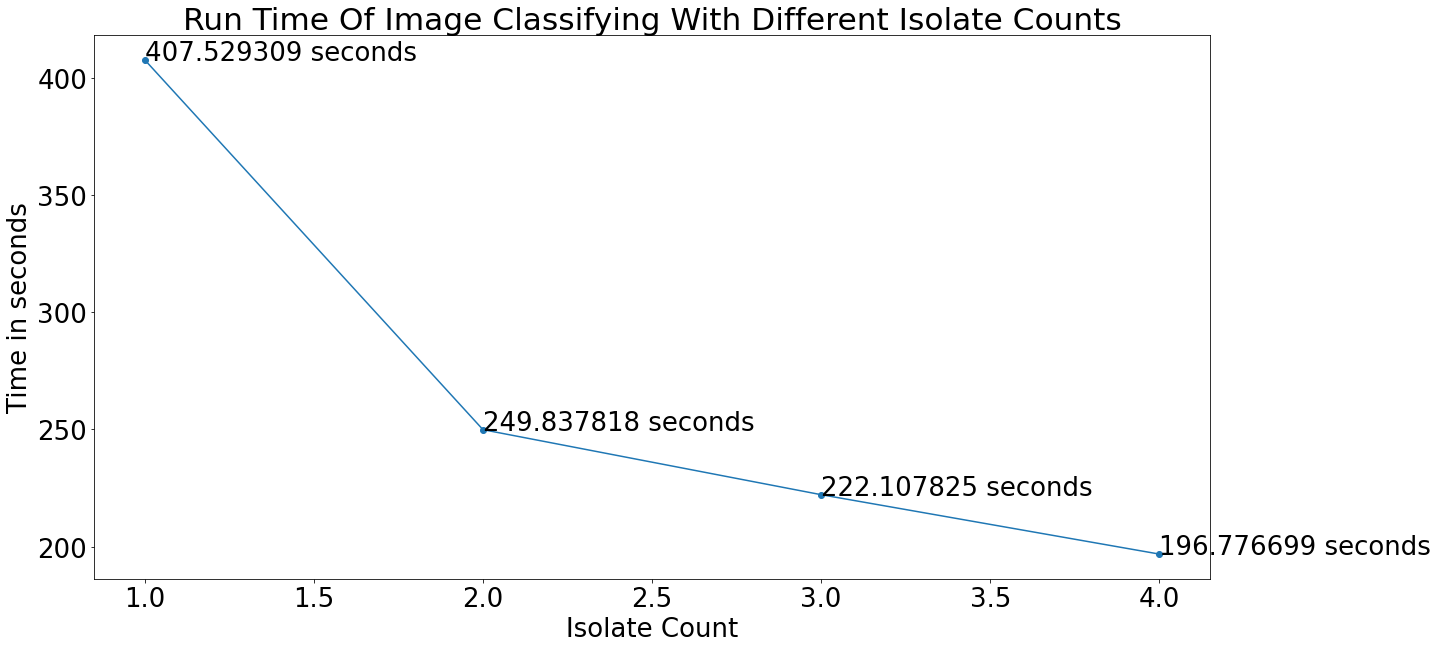

In [36]:
# Insta used here
# createGraph("data/1650274922103862-Tagging of images only total.json", "data/1650274989336800-Tagging of images only total.json", "data/1650275074235943-Tagging of images only total.json", "data/1650275157008042-Tagging of images only total.json")

imagesData = ["data/image/is365-t1-Tagging of images only total.json", \
    "data/image/is365-t2-Tagging of images only total.json",
    "data/image/is365-t3-Tagging of images only total.json",
    "data/image/is365-t4-Tagging of images only total.json",]

# createGraph(imagesData, "Run Time Of Image Classifying With Different Isolate Counts")
createGraph(imagesData, "Run Time Of Image Classifying With Different Isolate Counts", isSave = True, figureName = "Parallel Image Classify.jpg")

## Parser

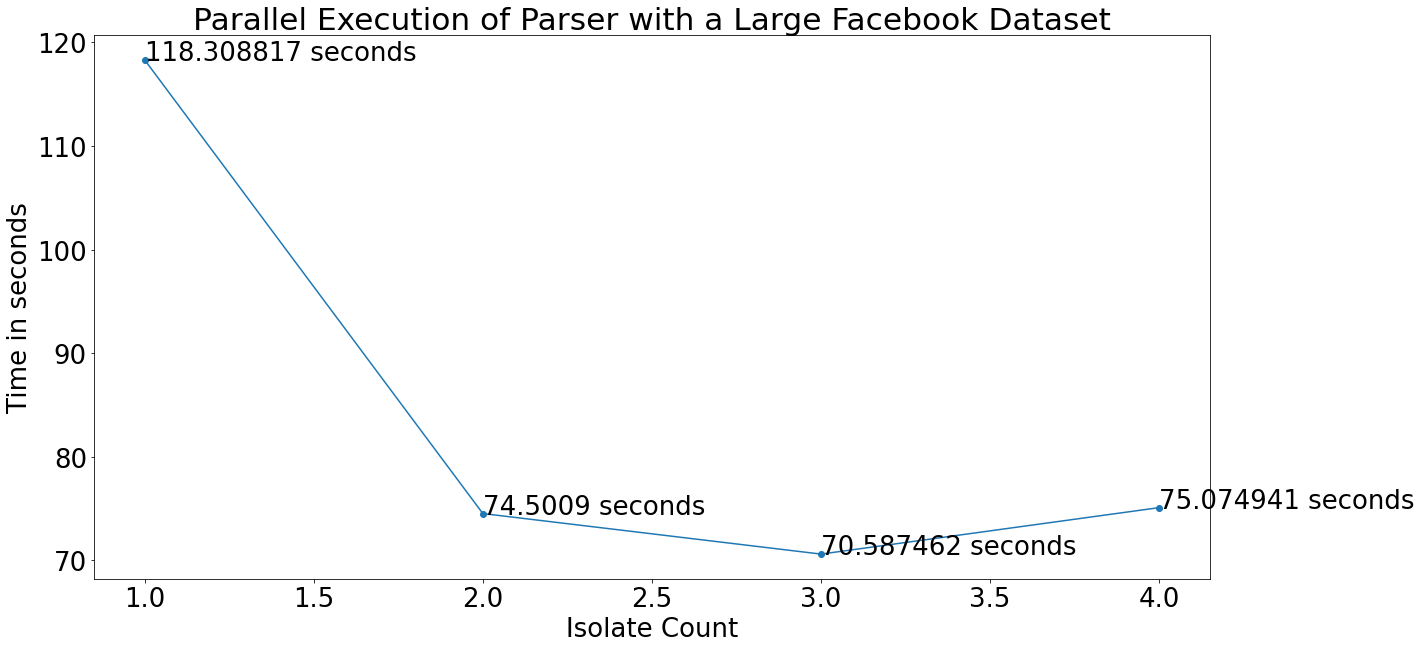

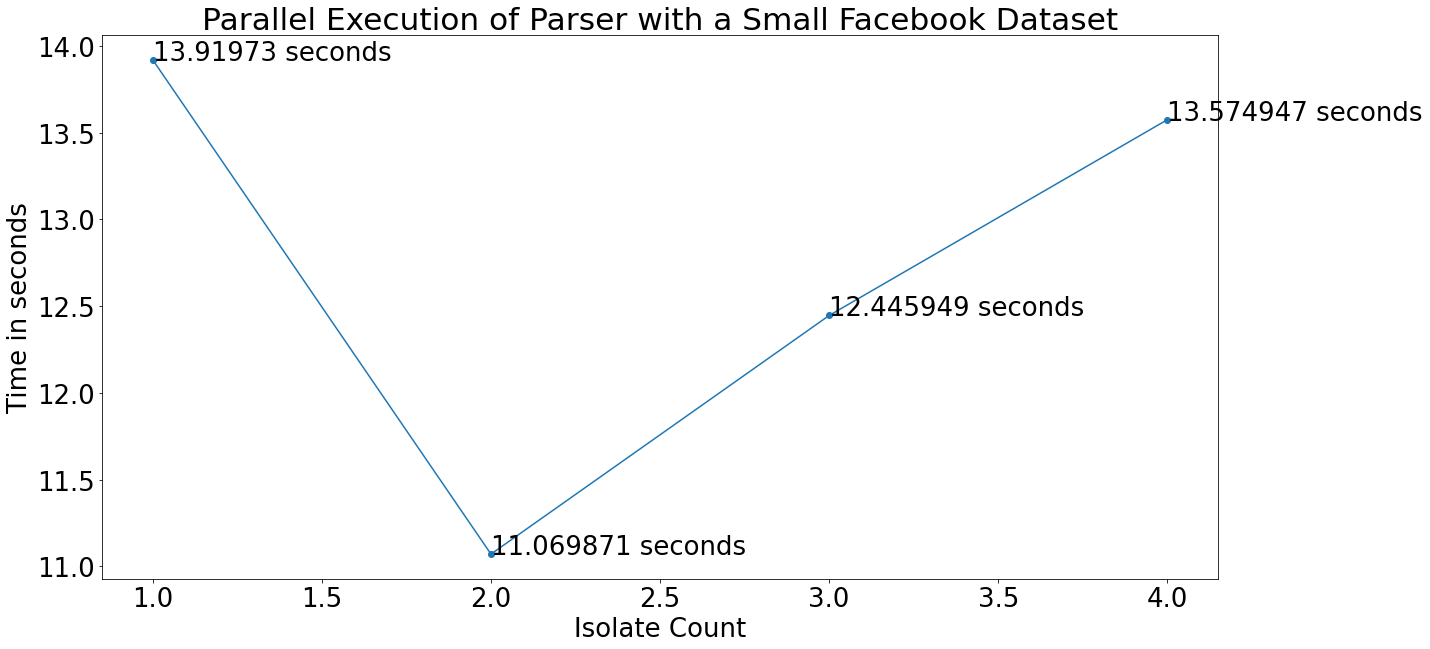

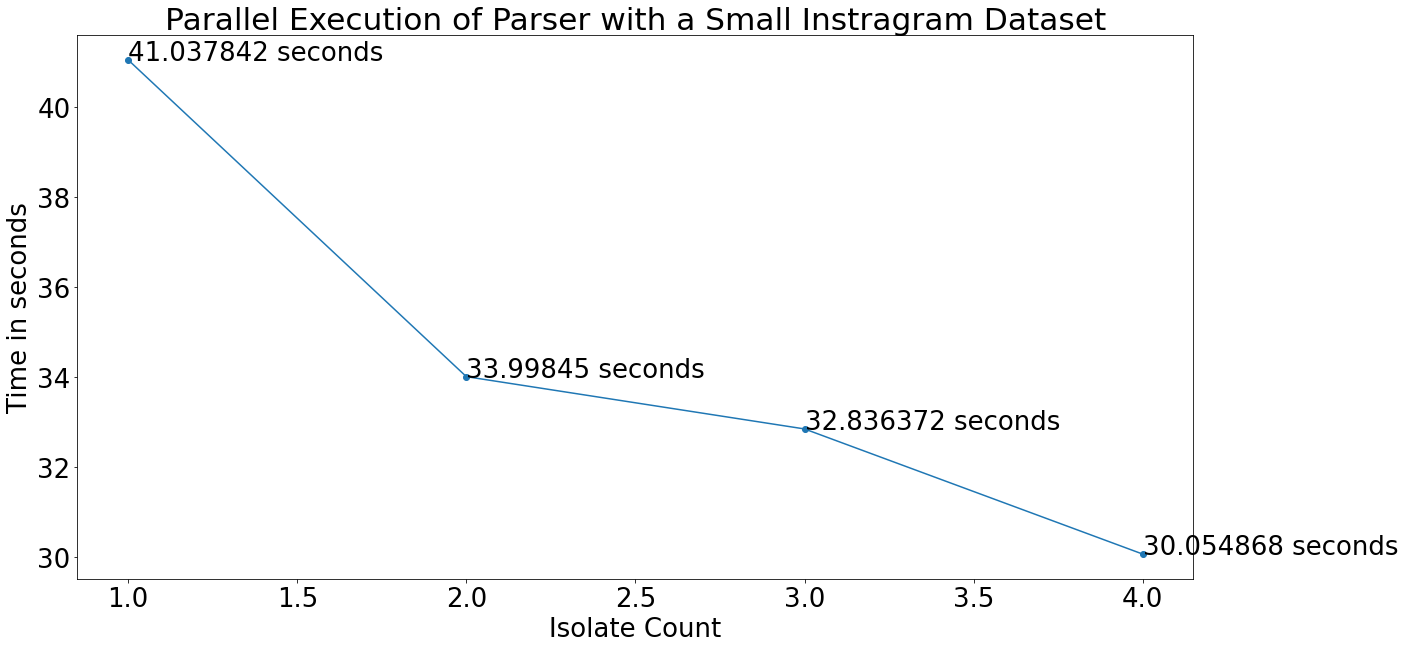

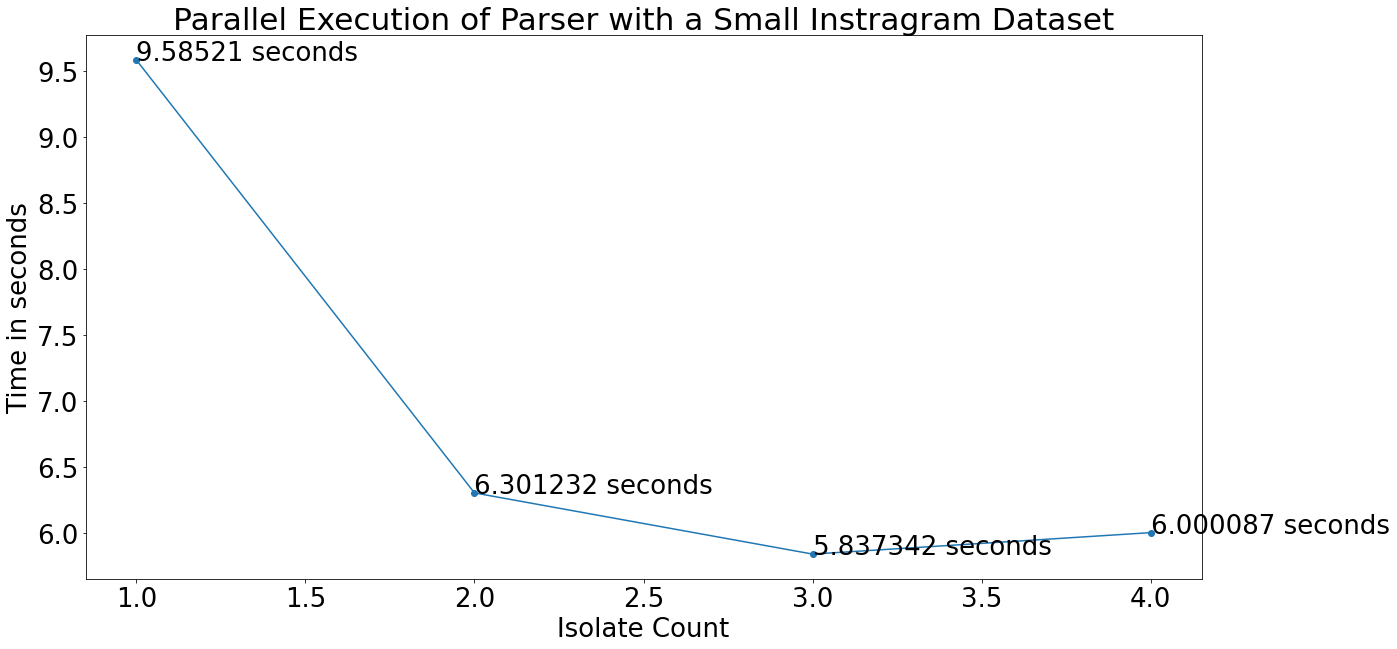

In [37]:
# Facebook used here
fbData = ["data/parser/fb-t1-Extraction and parsing.json", \
    "data/parser/fb-t2-Extraction and parsing.json", \
    "data/parser/fb-t3-Extraction and parsing.json", \
    "data/parser/fb-t4-Extraction and parsing.json",]

fsData = ["data/parser/fs-t1-Extraction and parsing.json", \
    "data/parser/fs-t2-Extraction and parsing.json", \
    "data/parser/fs-t3-Extraction and parsing.json", \
    "data/parser/fs-t4-Extraction and parsing.json"]

ibData = ["data/parser/ib-t1-Extraction and parsing.json", \
    "data/parser/ib-t2-Extraction and parsing.json", \
    "data/parser/ib-t3-Extraction and parsing.json", \
    "data/parser/ib-t4-Extraction and parsing.json"]

isData = ["data/parser/is-t1-Extraction and parsing.json", \
    "data/parser/is-t2-Extraction and parsing.json", \
    "data/parser/is-t3-Extraction and parsing.json", \
    "data/parser/is-t4-Extraction and parsing.json"]

# dataToAdd = [fbData, fsData, isData]

createGraph(fbData, "Parallel Execution of Parser with a Large Facebook Dataset", isSave = True, figureName = "Parallel extract and parse fb.jpg")
createGraph(fsData, "Parallel Execution of Parser with a Small Facebook Dataset", isSave = True, figureName = "Parallel extract and parse fs.jpg")
createGraph(ibData, "Parallel Execution of Parser with a Small Instragram Dataset", isSave = True, figureName = "Parallel extract and parse ib.jpg")
createGraph(isData, "Parallel Execution of Parser with a Small Instragram Dataset", isSave = True, figureName = "Parallel extract and parse is.jpg")